Name: Dharmik Kakadiya<br>Student ID: 8918216

# Lab 9 - Dense Neural Network

#### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with.

In [14]:
from tensorflow.keras.datasets import fashion_mnist

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [17]:
# Check the number of unique labels
num_classes = len(set(train_labels))
print("Number of classes:", num_classes)

Number of classes: 10


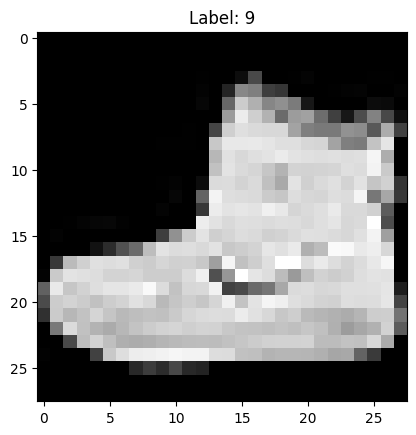

In [18]:
# Visualize the first image in the dataset
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [19]:
# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
# Flatten the images
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

In [21]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

#### 2. Train a Dense Neural Network with Different Hyperparameter Configurations

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [23]:
def create_model(layers, activation, optimizer):
    model = Sequential()
    for size in layers:
        model.add(Dense(size, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# Configuration 1
model1 = create_model(layers=[64, 64], activation='relu', optimizer=Adam())
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.6281 - accuracy: 0.7832 - val_loss: 0.4829 - val_accuracy: 0.8242
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.8496 - val_loss: 0.4058 - val_accuracy: 0.8550
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8624 - val_loss: 0.3840 - val_accuracy: 0.8619
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8697 - val_loss: 0.3721 - val_accuracy: 0.8662
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8764 - val_loss: 0.3590 - val_accuracy: 0.8699
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8818 - val_loss: 0.3617 - val_accuracy: 0.8684
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8871 - val_loss: 0.3586 - val_accuracy: 0.8753
Epoch 

In [25]:
# Configuration 2
model2 = create_model(layers=[128, 64], activation='relu', optimizer=Adam())
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5647 - accuracy: 0.8069 - val_loss: 0.4555 - val_accuracy: 0.8390
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4036 - accuracy: 0.8576 - val_loss: 0.3968 - val_accuracy: 0.8577
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8714 - val_loss: 0.3723 - val_accuracy: 0.8680
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8779 - val_loss: 0.3551 - val_accuracy: 0.8708
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8853 - val_loss: 0.3508 - val_accuracy: 0.8748
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2966 - accuracy: 0.8910 - val_loss: 0.3360 - val_accuracy: 0.8784
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.8968 - val_loss: 0.3311 - val_accuracy: 0.8811
Epoch 

In [26]:
# Configuration 3
model3 = create_model(layers=[128, 128, 64], activation='relu', optimizer=Adam())
history3 = model3.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5703 - accuracy: 0.7996 - val_loss: 0.4348 - val_accuracy: 0.8439
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3898 - accuracy: 0.8594 - val_loss: 0.3818 - val_accuracy: 0.8586
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3490 - accuracy: 0.8722 - val_loss: 0.3527 - val_accuracy: 0.8694
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3232 - accuracy: 0.8812 - val_loss: 0.3527 - val_accuracy: 0.8716
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3056 - accuracy: 0.8868 - val_loss: 0.3710 - val_accuracy: 0.8633
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2861 - accuracy: 0.8935 - val_loss: 0.3239 - val_accuracy: 0.8839
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2749 - accuracy: 0.8971 - val_loss: 0.3263 - val_accuracy: 0.8833
Epoch 

#### 3. Evaluate the Models and Choose the Best Configuration

In [27]:
# Evaluate each model
accuracy1 = model1.evaluate(test_images, test_labels)[1]
accuracy2 = model2.evaluate(test_images, test_labels)[1]
accuracy3 = model3.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8839


In [28]:
print(f"Accuracy of model 1: {accuracy1}")
print(f"Accuracy of model 2: {accuracy2}")
print(f"Accuracy of model 3: {accuracy3}")

Accuracy of model 1: 0.8769999742507935
Accuracy of model 2: 0.8788999915122986
Accuracy of model 3: 0.883899986743927


In [29]:
best_model = model3

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [31]:
# Predict the values from the test dataset
test_pred = best_model.predict(test_images)
test_pred_classes = np.argmax(test_pred, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

313/313 [==============================] - 1s 2ms/step


In [32]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[822   2  15  26   5   0 124   0   6   0]
 [  1 967   1  25   4   0   1   0   1   0]
 [  9   0 801  18  83   0  87   0   2   0]
 [ 12   7  10 903  42   0  23   0   3   0]
 [  1   1 117  23 808   0  50   0   0   0]
 [  0   0   0   1   0 958   0  27   3  11]
 [108   1  72  37  69   0 702   0  11   0]
 [  0   0   0   0   0  13   0 959   2  26]
 [  3   0   5   6   7   1   5   3 970   0]
 [  1   0   0   0   0  10   1  39   0 949]]


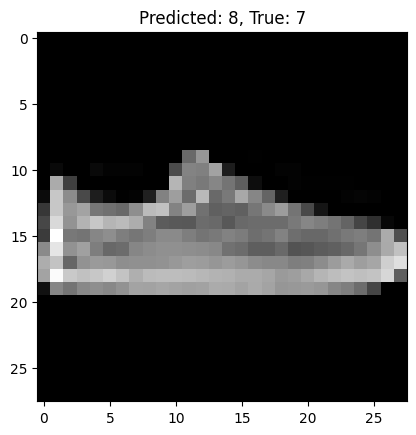

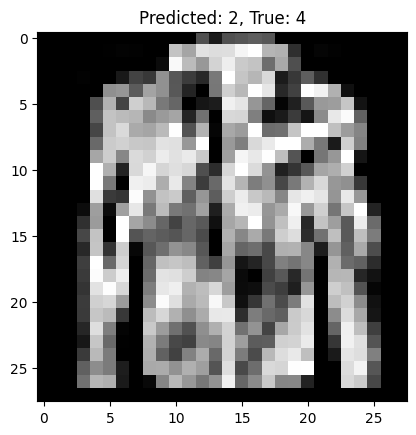

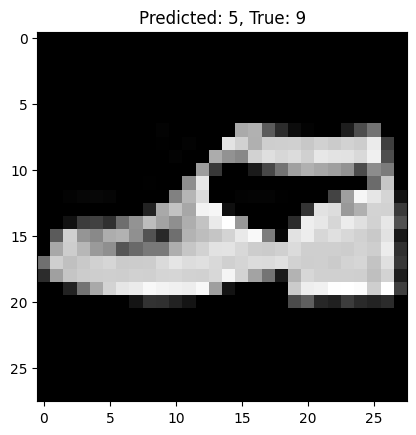

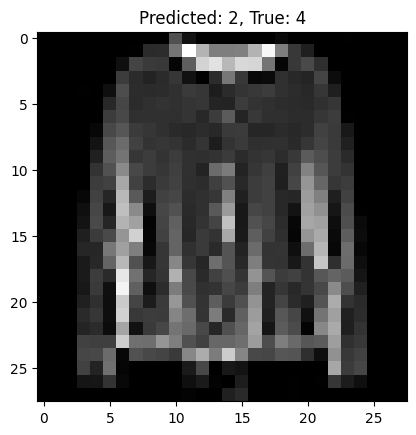

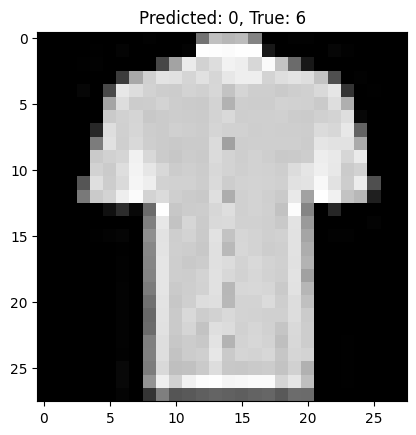

In [33]:
# Show some incorrect classifications
incorrect_indices = np.where(test_pred_classes != test_true_classes)[0]
for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.figure()
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {test_pred_classes[incorrect]}, True: {test_true_classes[incorrect]}")
    plt.show()

Conlusion:
- The model is quite good at predicting some classes, such as class 1 (Trouser), with 967 correct predictions out of 1000.
- The model often confuses certain classes with each other. For example, class 6 (Shirt) often needs to be clarified with class 0 (T-shirt/top), class 2 (Pullover), and class 4 (Coat).
- Some classes have many correct predictions, such as class 1 (Trouser) and class 7 (Sneaker), indicating that the model can distinguish these items well.
- The model could better distinguish between items with similar shapes and features, such as T-shirts/tops, Shirts, Pullovers, and Coats.